##### Спецкурс "Методы и алгоритмы компьютерного зрения"
---

### Дискретное преобразование Фурье и его использование в фильтрации изображений
---

#### $\S$ 1. Быстрое преобразование Фурье
Пусть 

$$
W_n = e^{\frac{2\pi i}{n}},~~n\in \mathbf{N}.
$$

Вектор $\mathrm{y} = \begin{pmatrix}y_0 & y_1 & \dots & y_{n-1}\end{pmatrix}^T$, где

$$
y_k = \sum\limits_{j=0}^{n-1} a_j W_n^{-k\cdot j}
$$

называется дискретным преобразованием Фурье (ДПФ) вектора коэффициентов $\mathrm{a} = \begin{pmatrix}a_0 & a_1 & \dots & a_{n-1}\end{pmatrix}^T$. Используется запись $\mathrm{y} = \mathrm{DFT}_n (\mathrm{a})$, где $\mathrm{DFT}$ сокращение Discrete Fourier Transform.

Рекурсивный алгоритм $DFT_{n}(a)$, где $a$ -- вектор:

$$
y_k = DFT_{{n/2}}(a[::2]) + W_n^{-k}  DFT_{{n/2}}(a[1::2]),~~k=0,1,\dots,\frac{n}{2}-1;
$$

$$
y_{k+\frac{n}{2}} = DFT_{{n/2}}(a[::2]) - W_n^{-k}  DFT_{{n/2}}(a[1::2]),~~k=0,1,\dots,\frac{n}{2}-1.
$$


Обратное дискретное преобразование Фурье вычисляется по формуле

$$
a_j = \frac{1}{n}\sum\limits_{k=0}^{n-1} y_k W_n^{k\cdot j}.
$$

#### $\S 2$ Задание

Реализовать рекурсивный алгоритм быстрого преобразования Фурье и обратного преобразования для векторов

In [1]:
import numpy as np
import cmath as cm

In [2]:
def fft1(a):
    i = complex(0, 1)
    n = len(a) # n является степенью 2
    if (n == 1):
        return a
    else:
        #...
        return y

def Invfft1(y):
    i = complex(0, 1)
    n = len(y) # n является степенью 2
    if (n == 1):
        return y
    else:
        #...
        return a

def ifft1(y):
    return (1 / len(y)) * Invfft1(y)

In [3]:
a = np.random.random(size = (8))
y1 = np.fft.fft(a) # прямое преобразование, реализованное в numpy
y2 = fft1(a)
print('Перобразование Фурье numpy = ', y1)
print('Перобразование Фурье мое = ', y2)

Перобразование Фурье numpy =  [ 3.06559063+0.j          0.11061318+0.24022646j -0.81144473-0.22748294j
 -0.4818241 -0.03189836j  0.89466137+0.j         -0.4818241 +0.03189836j
 -0.81144473+0.22748294j  0.11061318-0.24022646j]
Перобразование Фурье мое =  [ 3.06559063+0.j          0.11061318+0.24022646j -0.81144473-0.22748294j
 -0.4818241 -0.03189836j  0.89466137+0.j         -0.4818241 +0.03189836j
 -0.81144473+0.22748294j  0.11061318-0.24022646j]


In [4]:
a1 = np.fft.ifft(y1).real # обратное преобразование, реализованное в numpy
a2 = ifft1(y2).real
print('Обратное перобразование Фурье numpy = ', a1)
print('Обратное перобразование Фурье мое = ', a2)

Обратное перобразование Фурье numpy =  [0.19936759 0.39613844 0.62986148 0.07293877 0.38497305 0.26033534
 0.76592389 0.35605208]
Обратное перобразование Фурье мое =  [0.19936759 0.39613844 0.62986148 0.07293877 0.38497305 0.26033534
 0.76592389 0.35605208]


In [5]:
def fft2(A):
    #...
    return Y

def ifft2(Y):
    #...
    return A

In [6]:
A = np.random.random(size = (32, 32))

In [7]:
Y = fft2(A)
A_ = ifft2(Y).real
np.max(np.abs(A - A_))

5.551115123125783e-16

#### $\S$ 2. Фильтрация в частотной области. Другой вариант, не такой, как в лекции

In [8]:
from PIL import Image
import matplotlib.pyplot as plt       # графика
%matplotlib inline

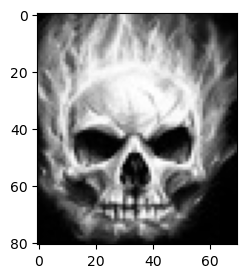

In [28]:
f = Image.open('Image\B.jpg').convert('L')
im = np.array(f)
fig = plt.figure(figsize = (3,3))
plt.imshow(f, cmap='gray')

$$
2^{s_1} > N ~~\Rightarrow~~s_1 > \frac{\ln N}{\ln 2}~~\Rightarrow~~s_1 = \left[\frac{\ln N}{\ln 2}\right] + 1.
$$

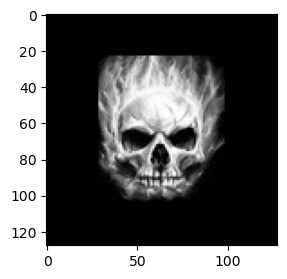

In [29]:
''' Дополняем нулями до размера 2^s'''
s1 = np.int32(np.log(im.shape[0]) / np.log(2)) + 1
s2 = np.int32(np.log(im.shape[1]) / np.log(2)) + 1
n1 = 2 ** s1
n2 = 2 ** s2
A = np.zeros((n1, n2))
i1 = np.int32((n1 - im.shape[0]) / 2)
i2 = np.int32((n2 - im.shape[1]) / 2)
A[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])] = im[:,:]
fig = plt.figure(figsize = (3,3))
plt.imshow(Image.fromarray(A), cmap='gray')

In [30]:
# 1. Центрирование преобразования Фурье
U = np.zeros((n1, n2))
for j1 in range(n1):
    for j2 in range(n2):
        U[j1, j2] = (-1) ** (j1 + j2)
A1 = A * U

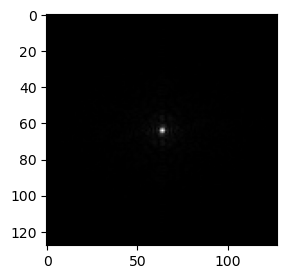

In [31]:
# 2. Преобразование Фурье
Y1 = fft2(A1) # np.fft.fft2(A1)
fig = plt.figure(figsize = (3,3))
Im = Image.fromarray(np.uint8(225 * ((np.abs(Y1) - np.min(np.abs(Y1))) / (np.max(np.abs(Y1)) - np.min(np.abs(Y1))))))
plt.imshow(Im, cmap='gray')

In [52]:
# 2. Создаем низкочастотный и высокочастотный фильтры
D0 = max(n1, n2) / 5
H1 = np.zeros((n1, n2))
for j1 in range(n1):
    for j2 in range(n2):
        D = np.sqrt(((j1 - (n1 / 2)) ** 2)  + ((j2 - (n2 / 2)) ** 2))
        H1[j1, j2] = np.exp(- (D ** 2) / (2 * (D0 ** 2)))
H2 = 1 - H1

In [53]:
# 3. Фильтрация и обратное преобразование
B1 = Y1 * H1 # сглаживание
B2 = Y1 * H2 # Выделение границ
F1 = (ifft2(B1) * U)[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])].real
F2 = (ifft2(B2) * U)[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])].real

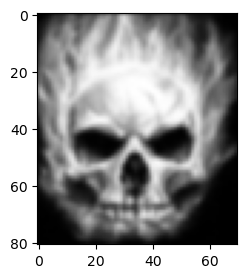

In [54]:
fig = plt.figure(figsize = (3,3))
plt.imshow(Image.fromarray(np.uint8(225 * ((F1 - np.min(F1)) / (np.max(F1) - np.min(F1))))), cmap='gray')

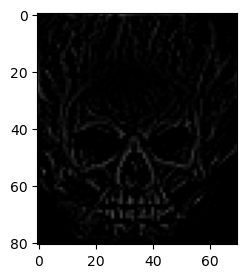

In [55]:
fig = plt.figure(figsize = (3,3))
plt.imshow(Image.fromarray(F2), cmap='gray')

### Литература

1. Кормен, Томас Х., Лейзерсон, Чарльз И., Ривест, Рональд Л., Штайн, Клиффорд. Алгоритмы: построение и анализ, 2-е издание.: пер. с англ. -- М. Издательский дом "Вильямс", 2013. -- 1296 с.: ил.